# Problem Set 2
MACS 30100, Dr. Evans  
Ling Dai

In [460]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as sts
import scipy.optimize as opt
import scipy.integrate as intgr
import math
import matplotlib.pyplot as plt
%matplotlib notebook

## 1(a)

<IPython.core.display.Javascript object>


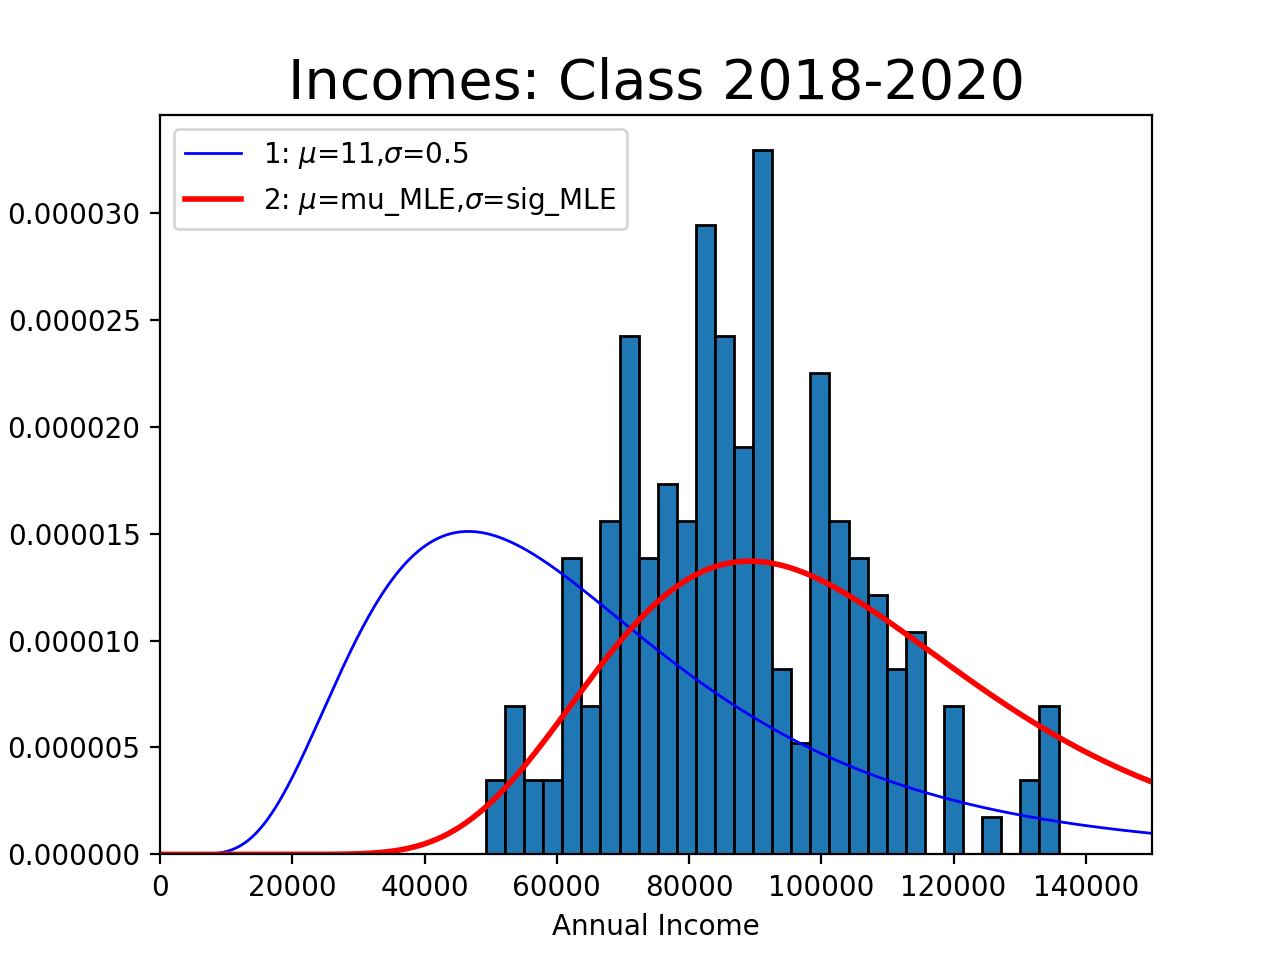

(0, 150000)

In [461]:
#Import income data
incomes = np.loadtxt('incomes.txt')

#1a: plot histogram of income data
count, bins, ignored = plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Incomes: Class 2018-2020', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Percent of scores')
plt.xlim([0, 150000])

## 1(b)

In [462]:
#1b: Plot the lognormal PDF f(mu = 11.0; sigma= 0.5) for 0 <= x <= 150,000

def lognorm_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the log normal pdf with mean mu and standard
    deviation sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the log-normally distributed random
             variable
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally distributed
             random variable
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''

            
    pdf_vals    = (1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals

dist_pts = np.linspace(0.001, 150000, 500)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1),
         linewidth=1, color='b', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

In [463]:
#1b: Define log_likelihood function for lognormal distribution,
#    and compute value of the log likelihood value for this parameterization of
#    the distribution and given this data.

def log_lik_lognorm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('The log likelihood is: {}'.format(log_lik_lognorm(incomes, mu_1, sig_1)))

The log likelihood is: -2385.85699781


## 1(c)

In [464]:
#1c: Estimate the parameters of the lognormal distribution by maximum likelihood

#Define criterion function
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the lognormally distributed random variable
    sigma  = scalar > 0, standard deviation of the lognormally distributed
             random variable
    args   = length 1 tuple, (xvals,)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_lognorm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    log_lik_val = log_lik_lognorm(args[0], mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val


#Perform MLE
mu_init = 11  
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
a = (incomes,)

#Report MLE results: mu, sig, likelihood, and VCV
results = opt.minimize(crit, params_init, args = (a), method='L-BFGS-B',
                       bounds=((None, None), (1e-10, None)))
mu_MLE, sig_MLE = results.x
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])

print('mu_MLE = {}, sig_MLE = {} \n'.format(mu_MLE, sig_MLE))
print('Log likelihood (MLE) = {} \n'.format(np.log(lognorm_pdf(incomes, mu_MLE, sig_MLE)).sum()))
print('VCV(MLE):')
print(vcv_mle)

mu_MLE = 11.4950161025, sig_MLE = 0.310879215015 

Log likelihood (MLE) = -2285.89995451 

VCV(MLE):
[[ 0.00052601 -0.00052601]
 [-0.00177876  0.00177876]]


/Users/lingdai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


In [465]:
#1c: Plot the estimated PDF for 0 <= x <= 150,000

dist_pts = np.linspace(1e-10, 150000, 500)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sig_MLE),
         linewidth=2, color='r', label='2: $\mu$=mu_MLE,$\sigma$=sig_MLE')
plt.legend(loc='upper left')

## 1(d)

In [466]:
#1d: Likelihood ratio test

log_lik_h0 = log_lik_lognorm(incomes, mu_1, sig_1)
log_lik_mle = log_lik_lognorm(incomes, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print(LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = {}'.format(pval_h0))

199.914086601
chi squared of H0 with 2 degrees of freedom p-value = 0.0


According to the chi-squared test above, h0 is rejected and the probability that the income data comes from the distribution in 1(b) is 0.

## 1(e)

In [467]:
#1e: What is the probability that you will earn more than $100,000? What is
#the probability that you will earn less than $75,000?

fx = lambda x: lognorm_pdf(x, mu_MLE, sig_MLE)

p_m_100000= intgr.quad(fx,100000,np.inf)[0]
p_l_75000 = intgr.quad(fx,1e-10, 75000)[0]

print("The probability that the income is more than $100,000 is {}".format(p_m_100000))
print("The probability that the income is less than $75,000 is {}".format(p_l_75000))

The probability that the income is more than $100,000 is 0.477030140492
The probability that the income is less than $75,000 is 0.192759200355


## 2(a)

In [468]:
#import sick data
sickDF = pd.read_csv('sick.txt', header = 0)

In [469]:
#define the error term function, the log likelihood function, and the criterion function

def sick_error(sick, age, children, avgtemp_winter, Betas):
    '''
    --------------------------------------------------------------------
    Computes the errorterm of the sickness regression function given the
    pandas DataFrame and four beta values.
    --------------------------------------------------------------------
    INPUTS:
    DF = pandas.DataFrame
    beta0 ~ beta3: regression coefficients
    
    RETURNS: error (a pandas.Series object)
    '''
    beta0, beta1, beta2, beta3 = Betas
    error_vals = sick - beta0 - beta1*age - beta2*children - beta3*avgtemp_winter
    return error_vals

def log_lik_norm(xvals, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = sts.norm.pdf(xvals, 0, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit2(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (5,) vector, ([beta1, beta2, beta3, beta4, sigma])
    args   = length 1 tuple, (DF,)
    xvals  = (N,) PandasDataFrame
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        errorterm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    Betas= params[:-1]
    sigma = params[-1]
    sick, age, children, avgtemp_winter  = args
    errors = sick_error(sick, age, children, avgtemp_winter, Betas)
    log_lik_val = log_lik_norm(errors, sigma)
    
    return -log_lik_val

In [470]:
#1a: Perform MLE
params_init = np.array([0,0,0,0,1])
args = (sickDF['sick'],sickDF['age'],sickDF['children'],sickDF['avgtemp_winter'])
a = (args)
results = opt.minimize(crit2, params_init, args = (a), method='BFGS')

#Print results
MLEbeta0, MLEbeta1, MLEbeta2, MLEbeta3, MLEstd = results.x
params_MLE = MLEbeta0, MLEbeta1, MLEbeta2, MLEbeta3
MLEerrors = sick_error(sickDF['sick'],sickDF['age'],sickDF['children'],sickDF['avgtemp_winter'], params_MLE)
off_diag_neg = np.eye(5)*2-1
VCV_MLE = results.hess_inv * off_diag_neg

print('MLEbeta0={}, MLEbeta1={}, MLEbeta2={}, MLEbeta3={}, MLEstd={} \n'.format(
       MLEbeta0, MLEbeta1, MLEbeta2, MLEbeta3, MLEstd))
print('The log likelihood value is: {} \n'.format(log_lik_norm(MLEerrors, MLEstd)))
print('Variance-covariance matrix of MLE:')
print(VCV_MLE)

/Users/lingdai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log


MLEbeta0=0.25164673015, MLEbeta1=0.0129333778416, MLEbeta2=0.400501789059, MLEbeta3=-0.00999169523694, MLEstd=0.00301772923144 

The log likelihood value is: 876.865046593 

Variance-covariance matrix of MLE:
[[  9.00008587e-07  -1.16965177e-08   2.01544466e-07   2.27843315e-08
   -3.09455155e-09]
 [ -1.16965177e-08   3.89263931e-09   3.42551697e-08   2.55289591e-09
    1.93935384e-11]
 [  2.01544466e-07   3.42551697e-08   3.54483330e-07  -2.26676454e-08
    1.33838734e-09]
 [  2.27843315e-08   2.55289591e-09  -2.26676454e-08   2.01798389e-09
    2.15386698e-11]
 [ -3.09455155e-09   1.93935384e-11   1.33838734e-09   2.15386698e-11
    2.31189675e-08]]


## 2(b)

In [471]:
#2b:
INITerrors = sick_error(sickDF['sick'],sickDF['age'],sickDF['children'],sickDF['avgtemp_winter'], params_init[:-1])
log_lik_h0 = log_lik_norm(INITerrors, params_init[-1])
log_lik_mle = log_lik_norm(MLEerrors, MLEstd)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = {}'.format(pval_h0))

chi squared of H0 with 2 degrees of freedom p-value = 0.0


As calculated above, the probability that 'age', 'child', and 'avgtemp_winter' have no influence on 'sick' is 0.